# Principal Component Analysis with Python

`Principal Component Analysis` (`PCA`) is an unsupervised learning algorithm that can transform data and attempt to find out what features explain the most variance in the data. We can then select a subset of those features that mostly explaining the data variance to cluster or visualize data points as different sets of relating data points. Large datasets are increasingly common and are often difficult to interpret. `PCA` is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [1]:
%%html
<div>
<iframe
    width="448" height="252"
    src="https://www.youtube.com/embed/FgakZw6K1QQ"
    title="YouTube video player"
    frameborder="0"
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
    allowfullscreen>
</iframe>

<iframe
    width="448" height="252" 
    src="https://www.youtube.com/embed/HMOI_lkzW08"
    title="YouTube video player"
    frameborder="0"
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
    allowfullscreen>
</iframe>
</div>

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Data

We will be using the `cancer data set` that comes as one of `sklearn`'s built-in data sets. This data set has so many features and is greatly appropriate for demonstrating `PCA`.

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
# Load in the breast cancer data set
cancer = load_breast_cancer()

In [5]:
# Check keys of the cancer Bunch object
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# Print out a description of the cancer data set
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer_df = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Find out the target names
# 0 - malignant
# 1 = benign
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

## Visualizing Original Data

In [9]:
# Extract only mean columns
cancer_features_and_target_df = pd.DataFrame(
    data = cancer['data'],
    columns=cancer['feature_names']
)
cancer_features_and_target_df['Cancer'] = cancer['target']
mean_and_cancer_columns = [
    col_name for col_name in cancer_features_and_target_df.columns if 'mean' in col_name
]
mean_and_cancer_columns.append('Cancer')
cancer_features_and_target_df[mean_and_cancer_columns]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


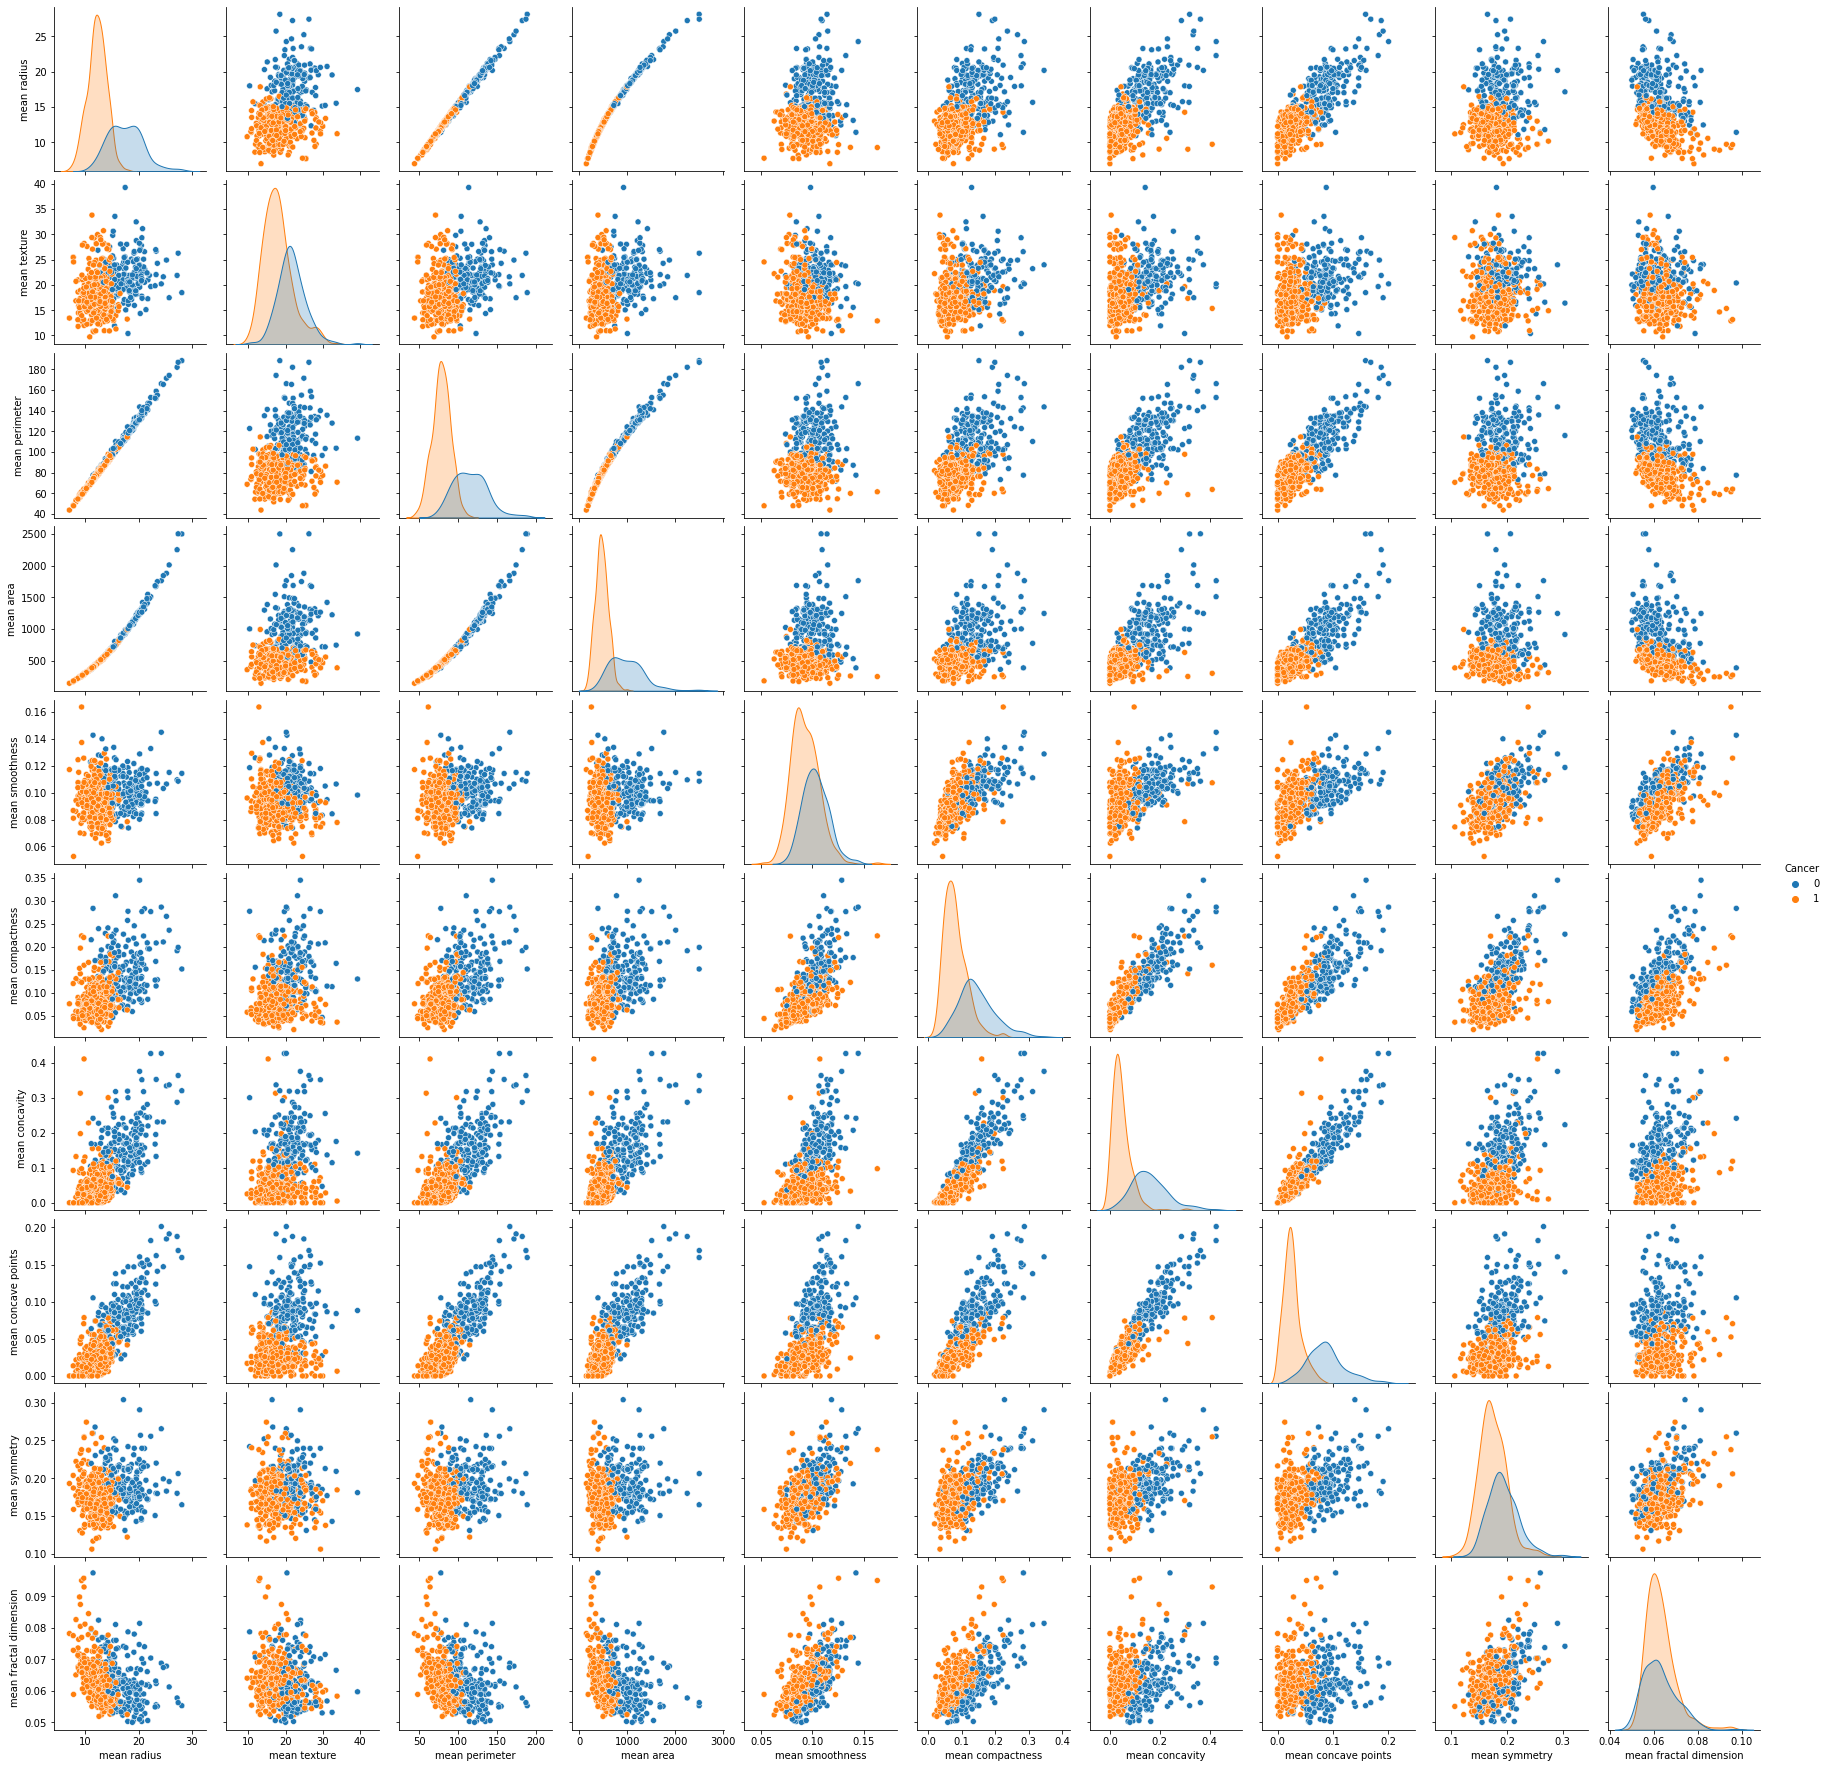

In [10]:
sns.pairplot(cancer_features_and_target_df[mean_and_cancer_columns], hue='Cancer')

## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Create a standard scaler and fit it to the cancer data
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance
scaler.fit(cancer_df)

StandardScaler()

In [13]:
scaled_data = scaler.transform(cancer_df)

In [14]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

<font color=magenta>`PCA` with `Scikit Learn` uses a very similar process to other preprocessing functions that come with `Scikit Learn`. We instantiate a `PCA` object, find the `principal components` using the `fit()` method, then appy the **rotation** and **dimensionality reduction** by calling `transform()` method.
We can also specify how many `principal components` we want to keep when creating the `PCA` object.</font>

In [15]:
from sklearn.decomposition import PCA

In [16]:
# Create a PCA object
# Number of components to keep = 2
pca = PCA(n_components=2)

In [17]:
# Call fit() to find  principal components
pca.fit(scaled_data)

PCA(n_components=2)

In [18]:
# Call transform() to transform the scaled data to its first 2 principal components
x_pca = pca.transform(scaled_data) # Apply dimensionality reduction to scaled_data
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [19]:
scaled_data.shape

(569, 30)

In [20]:
x_pca.shape

(569, 2)

<font color=magenta>The dimensions of data have been reduced from `30` to just `2`. We can use this 2-dimensional data features to plot out the data points.</font>

<AxesSubplot:>

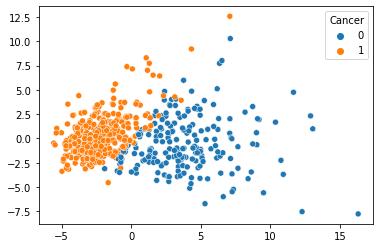

In [21]:
# Use seaborn to plot out the data returned by PCA, while using the original target values 'Cancer'
# to see how good classification/clustering of data points newly represented by PCA could be.
sns.scatterplot(data=x_pca, x=x_pca[:, 0], y=x_pca[:, 1], hue=cancer_features_and_target_df['Cancer'])

Text(0, 0.5, 'Second Principal Component')

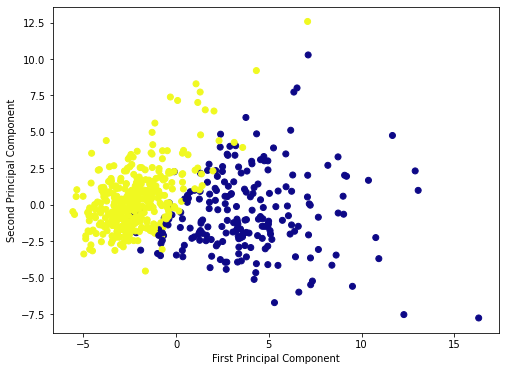

In [22]:
# Another way to plot PCA data - using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(
    x_pca[:, 0], # x axis
    x_pca[:, 1], # y axis
    c=cancer['target'],
    cmap='plasma'
)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<font color=magenta>Looking at the above two plots, we can see that it is easy to separate data points into two classes just by using these two `principal components`.</font>

## Interpreting Principal Components

<font color=magenta>`PCA` gives us a powerful technique of dimensionality reduction. It is however not easy to understand what these `principal components` represent.
<br><br>
The `principal components` correspond to combinations of the original features. The components themselves are stored as an attribute of the fitted `PCA` object.</font>

In [23]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<font color=magenta>In the `pca.components_` numpy matrix array, each row represents a principal component, and each column relates back to the original features. We can visualize this relationship with a heatmap.</font>

In [24]:
principal_components_df = pd.DataFrame(
    data=pca.components_,
    columns=cancer_df.columns
)
principal_components_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<font color=magenta>In the above `DataFrame`, row `0` represents `principal component` `0`, and row `1` represents `principal component` `1`. Each column represents the correlation between each `principal component` and the original `feature`. The higher the value in each column is, the more correlated to the original `feature` the `principal component` is.</font>

<AxesSubplot:>

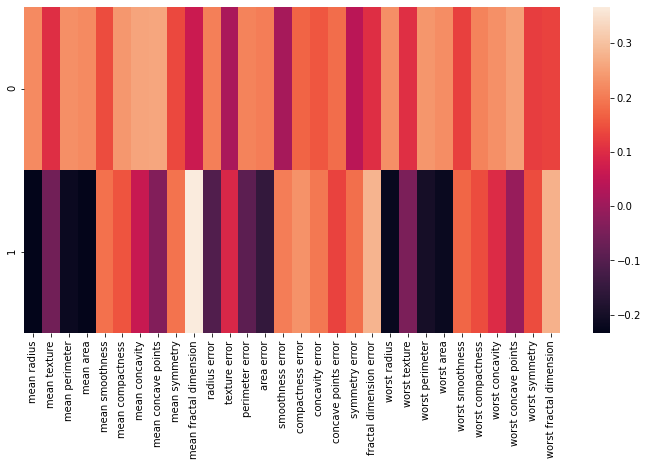

In [25]:
# Visualize the correlation between principal components and original data features
plt.figure(figsize=(12, 6))
sns.heatmap(principal_components_df)

<font color=magenta>Now we can just use the `principal components` data to feed in classification machine learning algorithms to classify data points!</font>